In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [103]:
covid = pd.read_csv('Covid19.csv', parse_dates= ['Date_reported'])
covid = covid[(covid['New_cases'] >= 0) & (covid['New_deaths'] >= 0)]

In [104]:
covid.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
2,2020-01-04,PW,Palau,WPR,0.0,0,0.0,0
4,2020-01-04,PN,Pitcairn,WPR,0.0,0,0.0,0
10,2020-01-04,TH,Thailand,SEAR,0.0,0,0.0,0
11,2020-01-04,VU,Vanuatu,WPR,0.0,0,0.0,0
15,2020-01-04,BT,Bhutan,SEAR,0.0,0,0.0,0


In [105]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 152817 entries, 2 to 487526
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date_reported      152817 non-null  datetime64[ns]
 1   Country_code       152269 non-null  object        
 2   Country            152817 non-null  object        
 3   WHO_region         152817 non-null  object        
 4   New_cases          152817 non-null  float64       
 5   Cumulative_cases   152817 non-null  int64         
 6   New_deaths         152817 non-null  float64       
 7   Cumulative_deaths  152817 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 10.5+ MB


In [106]:
covid['New_cases'].isna().sum()

0

<h3>56% Of data is missing</h3>

In [107]:
covid = covid.sort_values(["Country", "WHO_region", "Date_reported"]).reset_index(drop = True)

In [108]:
grouped_data = covid.groupby(['Country'	,'WHO_region'])

<h3>Sorting and grouping data for preparing for shifting operations</h3>

In [109]:
covid["Cumulative_cases_prev"] = grouped_data["Cumulative_cases"].shift(1, fill_value= 0)
covid["Cumulative_deaths_prev"] = grouped_data["Cumulative_deaths"].shift(1, fill_value= 0)

<h3>Shifting the data of the cumulative columns  to create a new column indicating the previous cumulative data</h3>

In [110]:
covid.isna().sum()

Date_reported               0
Country_code              548
Country                     0
WHO_region                  0
New_cases                   0
Cumulative_cases            0
New_deaths                  0
Cumulative_deaths           0
Cumulative_cases_prev       0
Cumulative_deaths_prev      0
dtype: int64

In [111]:
covid['New_cases'] = covid.apply(
    lambda row: (row['Cumulative_cases'] - row['Cumulative_cases_prev']) if pd.isna(row['New_cases']) else row['New_cases'], axis= 1
)

<h3>Subtracting the previous cumulative cases to the current cumulative cases to fill the missing new cases values</h3>

In [112]:
covid['New_deaths'] = covid.apply(
    lambda row: (row['Cumulative_deaths'] - row['Cumulative_deaths_prev']) if pd.isna(row['New_deaths']) else row['New_deaths'], axis= 1
)

<h3>Subtracting the previous cumulative cases to the current cumulative cases to fill the missing new cases values</h3>

In [113]:
covid.dropna(inplace= True)

<h3>Dropping the missing Columns from country code columns since it's less than 5% o the data</h3>

In [114]:
covid.isna().sum()

Date_reported             0
Country_code              0
Country                   0
WHO_region                0
New_cases                 0
Cumulative_cases          0
New_deaths                0
Cumulative_deaths         0
Cumulative_cases_prev     0
Cumulative_deaths_prev    0
dtype: int64

<h3>All the missing values are imputed or deleted</h3>

In [115]:
covid['year'] = covid['Date_reported'].dt.year

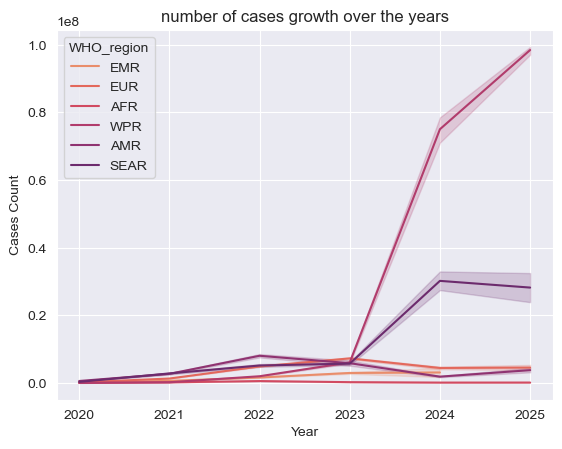

In [133]:
sns.lineplot(data= covid, y= 'Cumulative_cases',x= 'year',hue= 'WHO_region')
plt.xlabel("Year")
plt.ylabel("Cases Count")
plt.title("number of cases growth over the years")
plt.show()

<h3>SEAR was the most rapid cases grow</h3>

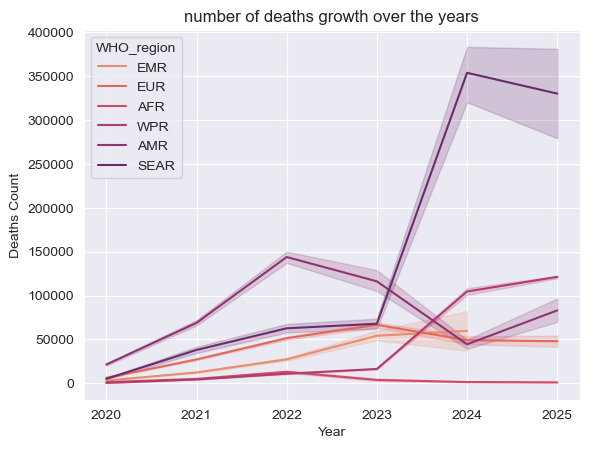

In [134]:
sns.lineplot(data= covid, y= 'Cumulative_deaths',x= 'year',hue= 'WHO_region')
plt.xlabel("Year")
plt.ylabel("Deaths Count")
plt.title("number of deaths growth over the years")
plt.show()

<h3>SEAR has the most rapid deaths grow</h3>

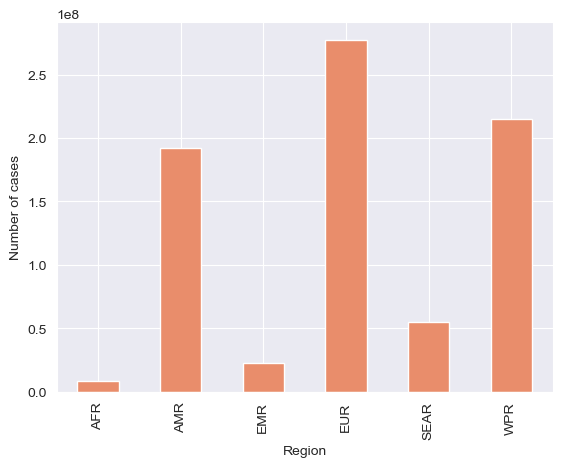

In [132]:
covid.groupby("WHO_region")['New_cases'].sum().plot(kind='bar')
plt.xlabel("Region")
plt.ylabel("Number of cases")
plt.show()

<h3>EUR is the region with the most number of cases</h3>

In [119]:
sns.set_style('darkgrid')
sns.set_palette('flare')

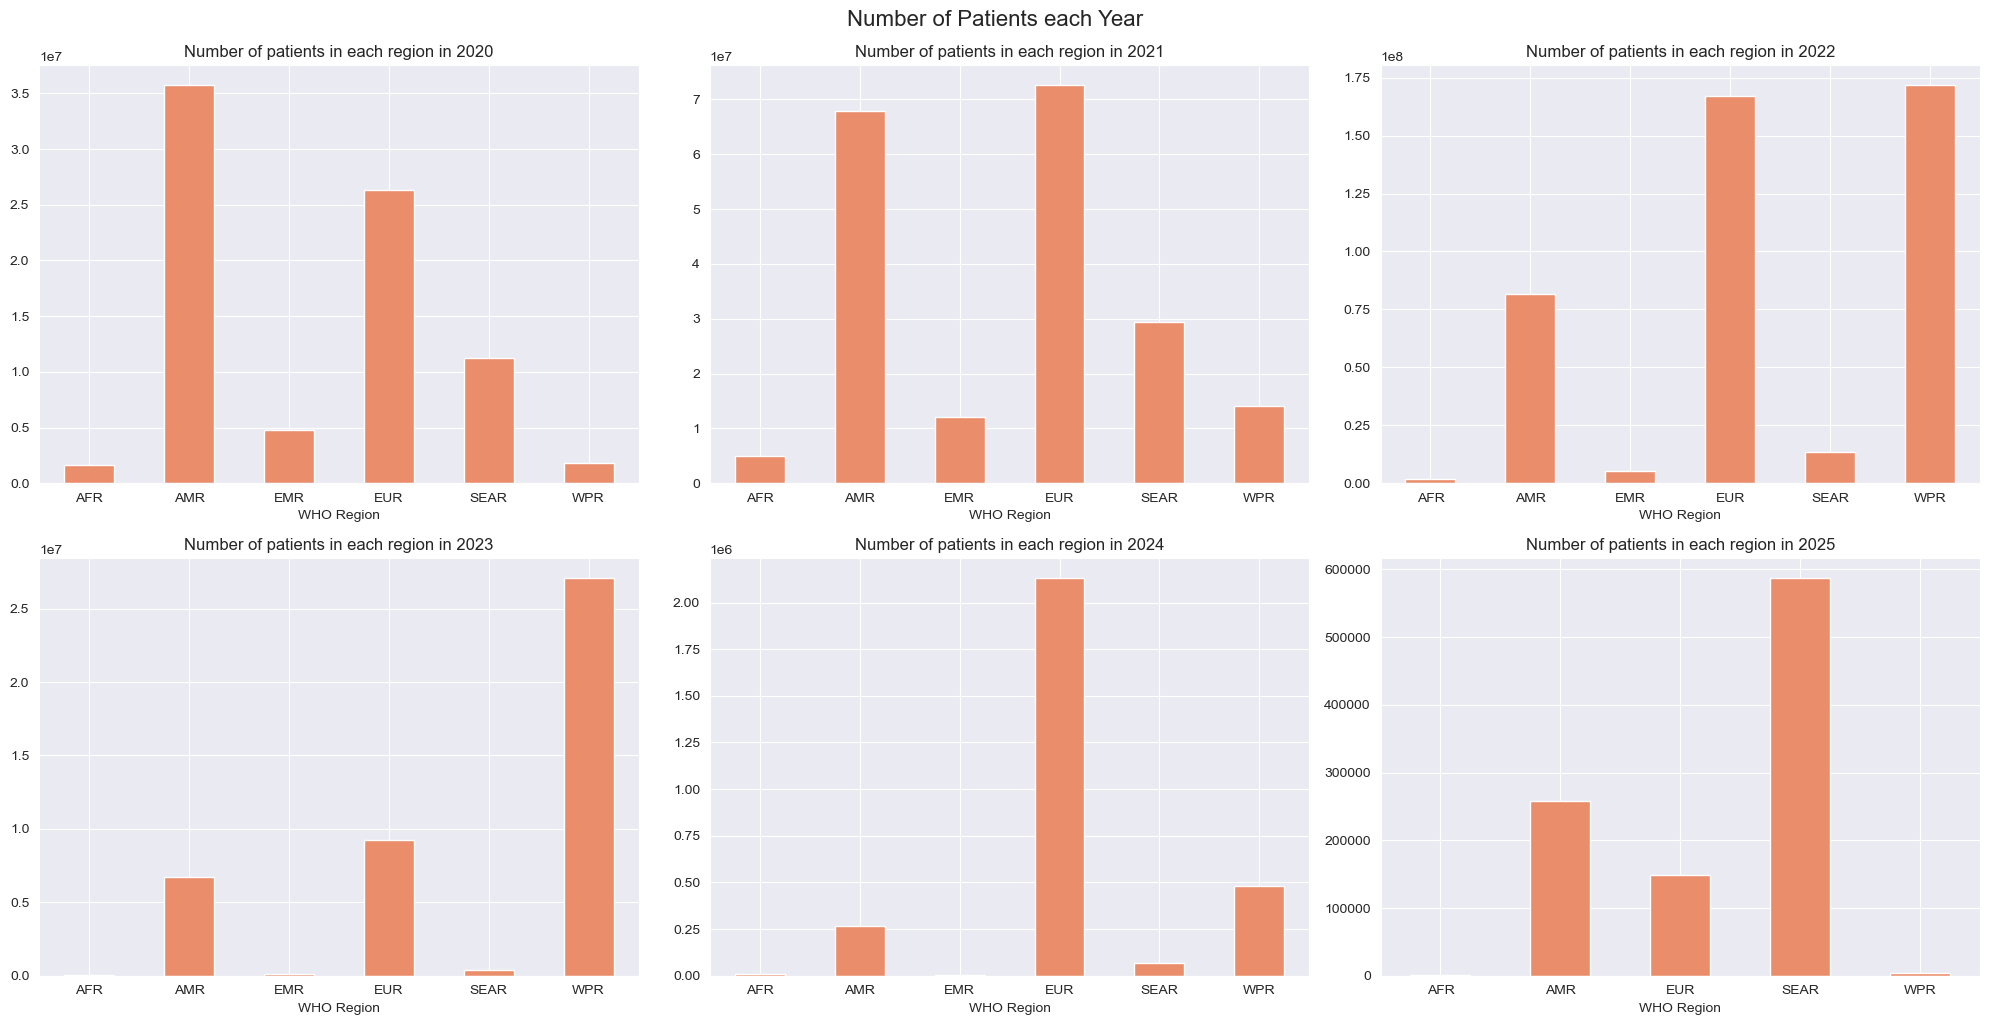

In [120]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()
for y, c in enumerate(covid['year'].unique()):
    covid[covid['year'] == c].groupby('WHO_region')['New_cases'].sum().plot(kind='bar', ax=axs[y])
    axs[y].set_xticklabels(axs[y].get_xticklabels(), rotation=0)
    axs[y].set_xlabel('WHO Region')
    axs[y].set_title(f'Number of patients in each region in {c}')

plt.tight_layout()
plt.suptitle('Number of Patients each Year', x=0.5, y=1.02, fontsize=16)
plt.show()

<h3>2022 Was the year with the most number of cases and WPR is the region with the most number of patients</h3>

<h2>Studying 2022</h2>

In [121]:
year2022 = covid[covid['year'] == 2022]
year2022 = year2022[year2022['New_deaths'] >= 0]


In [122]:
year2022['month'] = covid['Date_reported'].dt.month

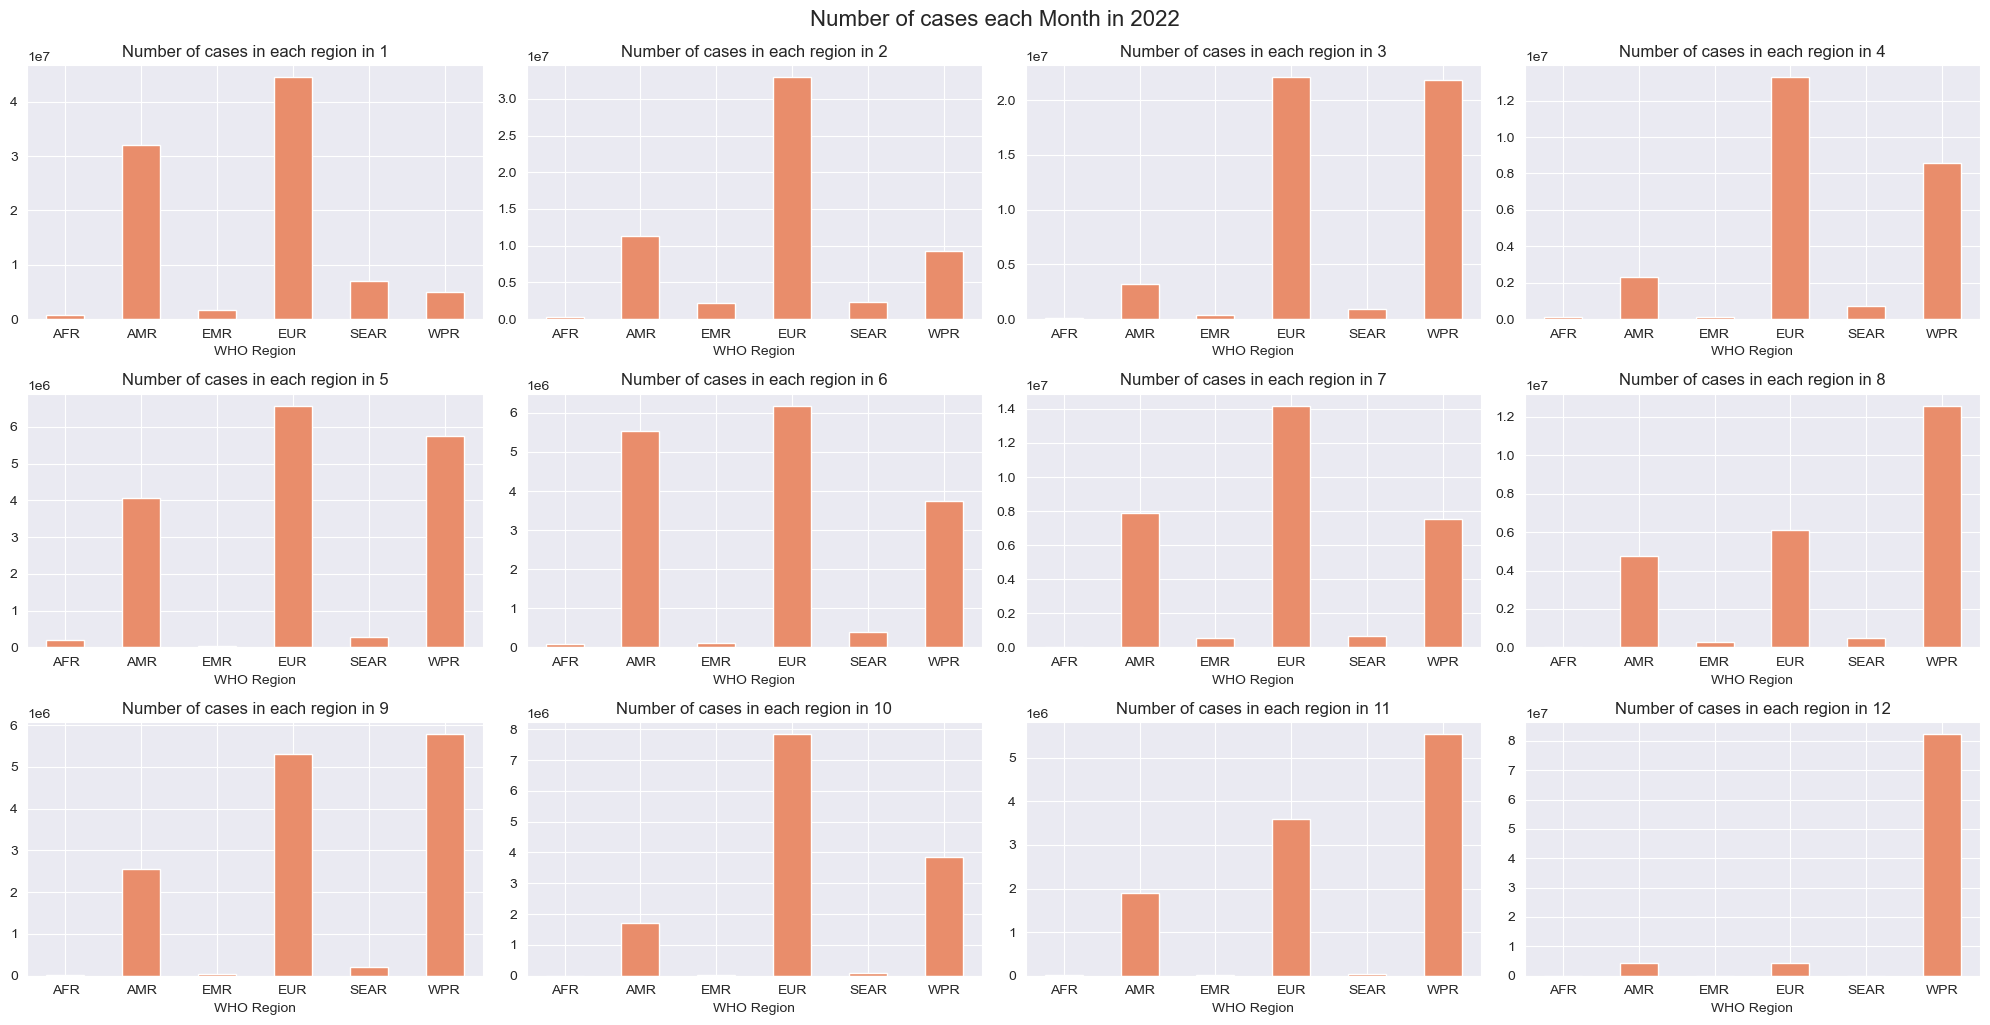

In [123]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 10))
axs = axs.flatten()
for y, c in enumerate(year2022['month'].unique()):
    year2022[year2022['month'] == c].groupby('WHO_region')['New_cases'].sum().plot(kind='bar', ax=axs[y])
    axs[y].set_xticklabels(axs[y].get_xticklabels(), rotation=0)
    axs[y].set_xlabel('WHO Region')
    axs[y].set_title(f'Number of cases in each region in {c}')

plt.tight_layout()
plt.suptitle('Number of cases each Month in 2022', x=0.5, y=1.02, fontsize=16)
plt.show()

<h3>January was the month with the most number of cases in 2022 and EUR is the region with the most number of cases</h3>

In [124]:
print(year2022['New_cases'].corr(year2022['New_deaths']))

0.3982641204763488


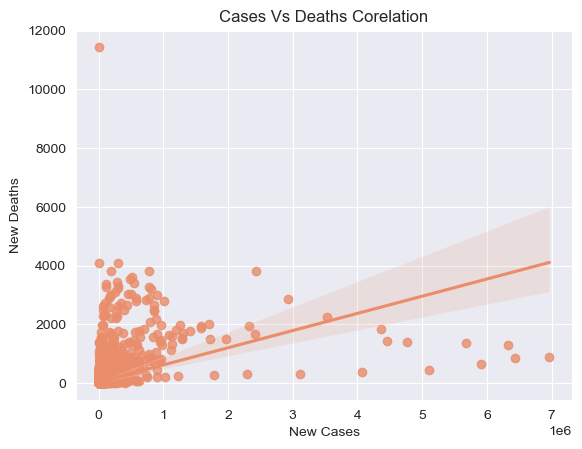

In [125]:
sns.regplot(data= year2022, x= 'New_cases', y= 'New_deaths')
plt.xlabel('New Cases')
plt.ylabel('New Deaths')
plt.title("Cases Vs Deaths Corelation")
plt.show()

<h3>Correlation Between Deaths and Cases is 39% in 2022</h3>



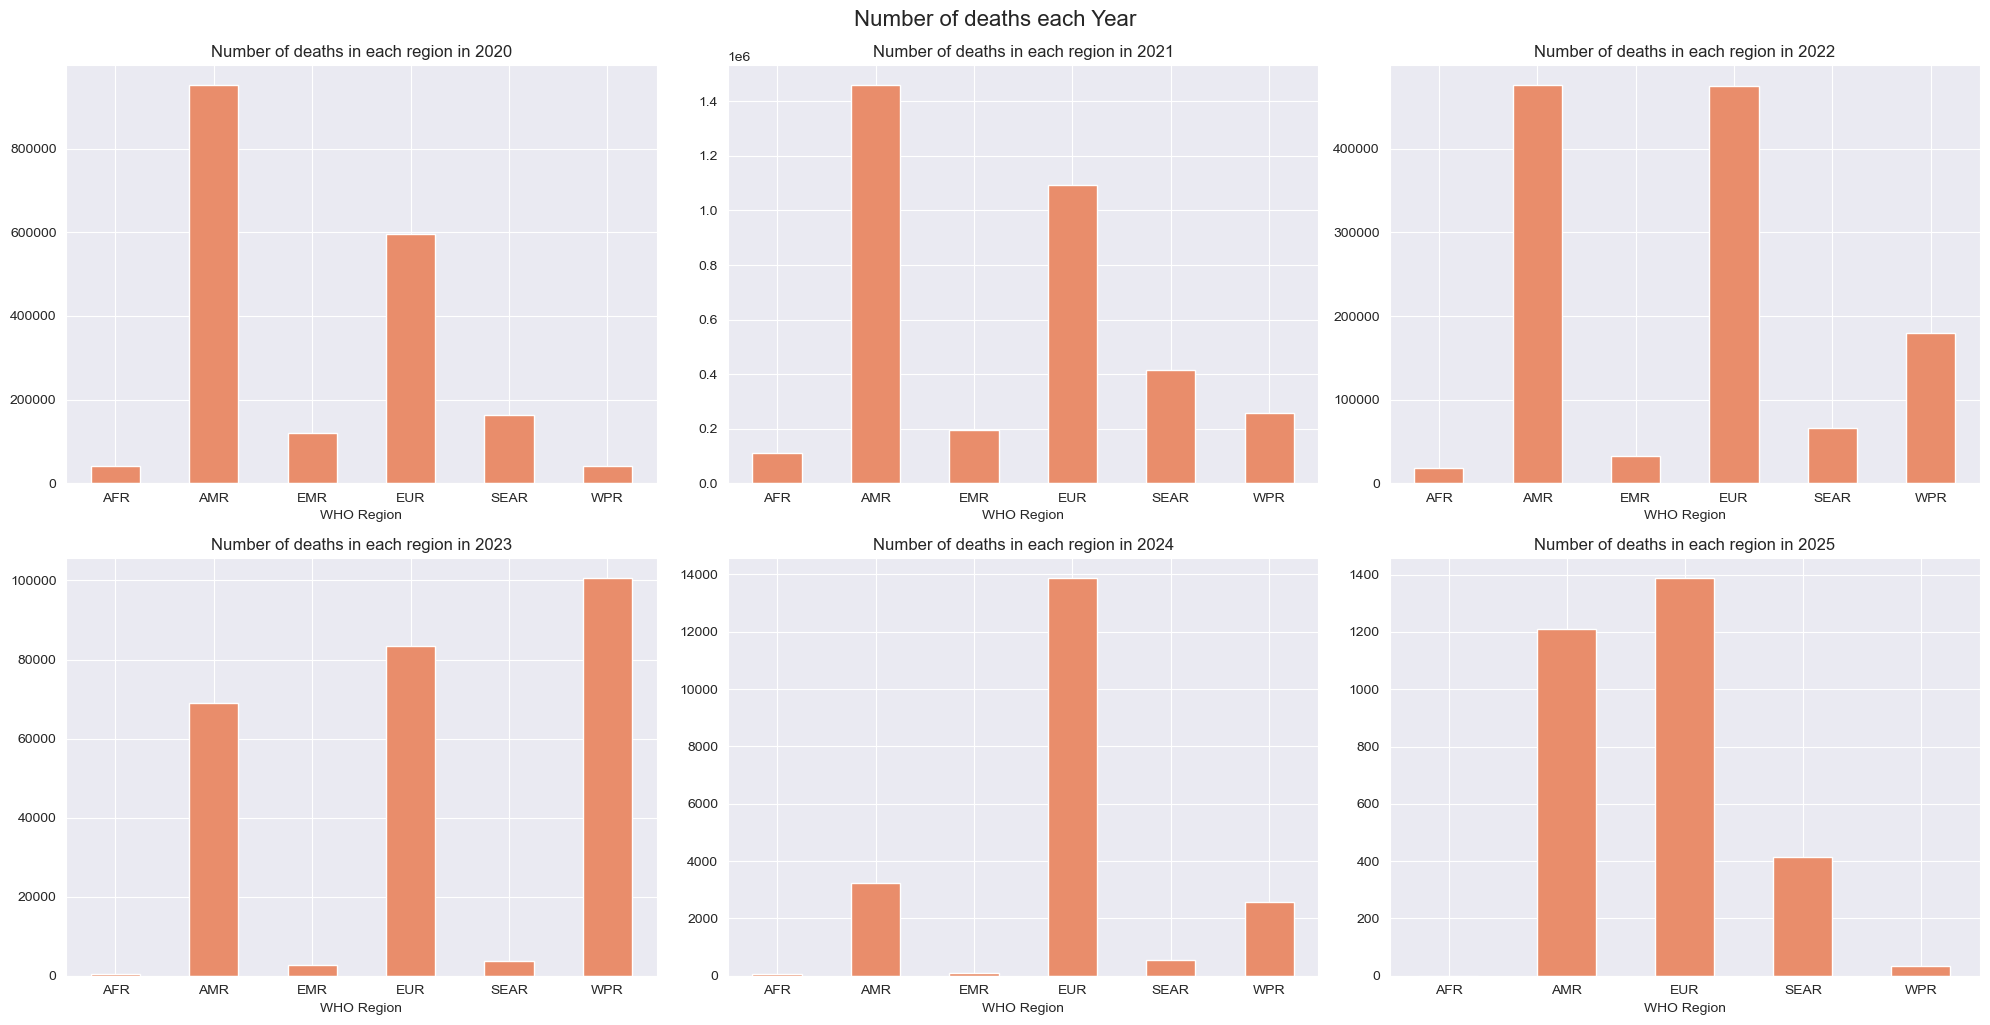

In [126]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()
for y, c in enumerate(covid['year'].unique()):
    covid[covid['year'] == c].groupby('WHO_region')['New_deaths'].sum().plot(kind='bar', ax=axs[y])
    axs[y].set_xticklabels(axs[y].get_xticklabels(), rotation=0)
    axs[y].set_xlabel('WHO Region')
    axs[y].set_title(f'Number of deaths in each region in {c}')

plt.tight_layout()
plt.suptitle('Number of deaths each Year', x=0.5, y=1.02, fontsize=16)
plt.show()

<h3>2021 was the year with the most number of deaths and AMR is the region with the most number o deaths</h3>

<h2>Studying 2021</h2>

In [127]:
year2021 = covid[covid['year'] == 2021]

In [128]:
year2021['month'] = year2021['Date_reported'].dt.month

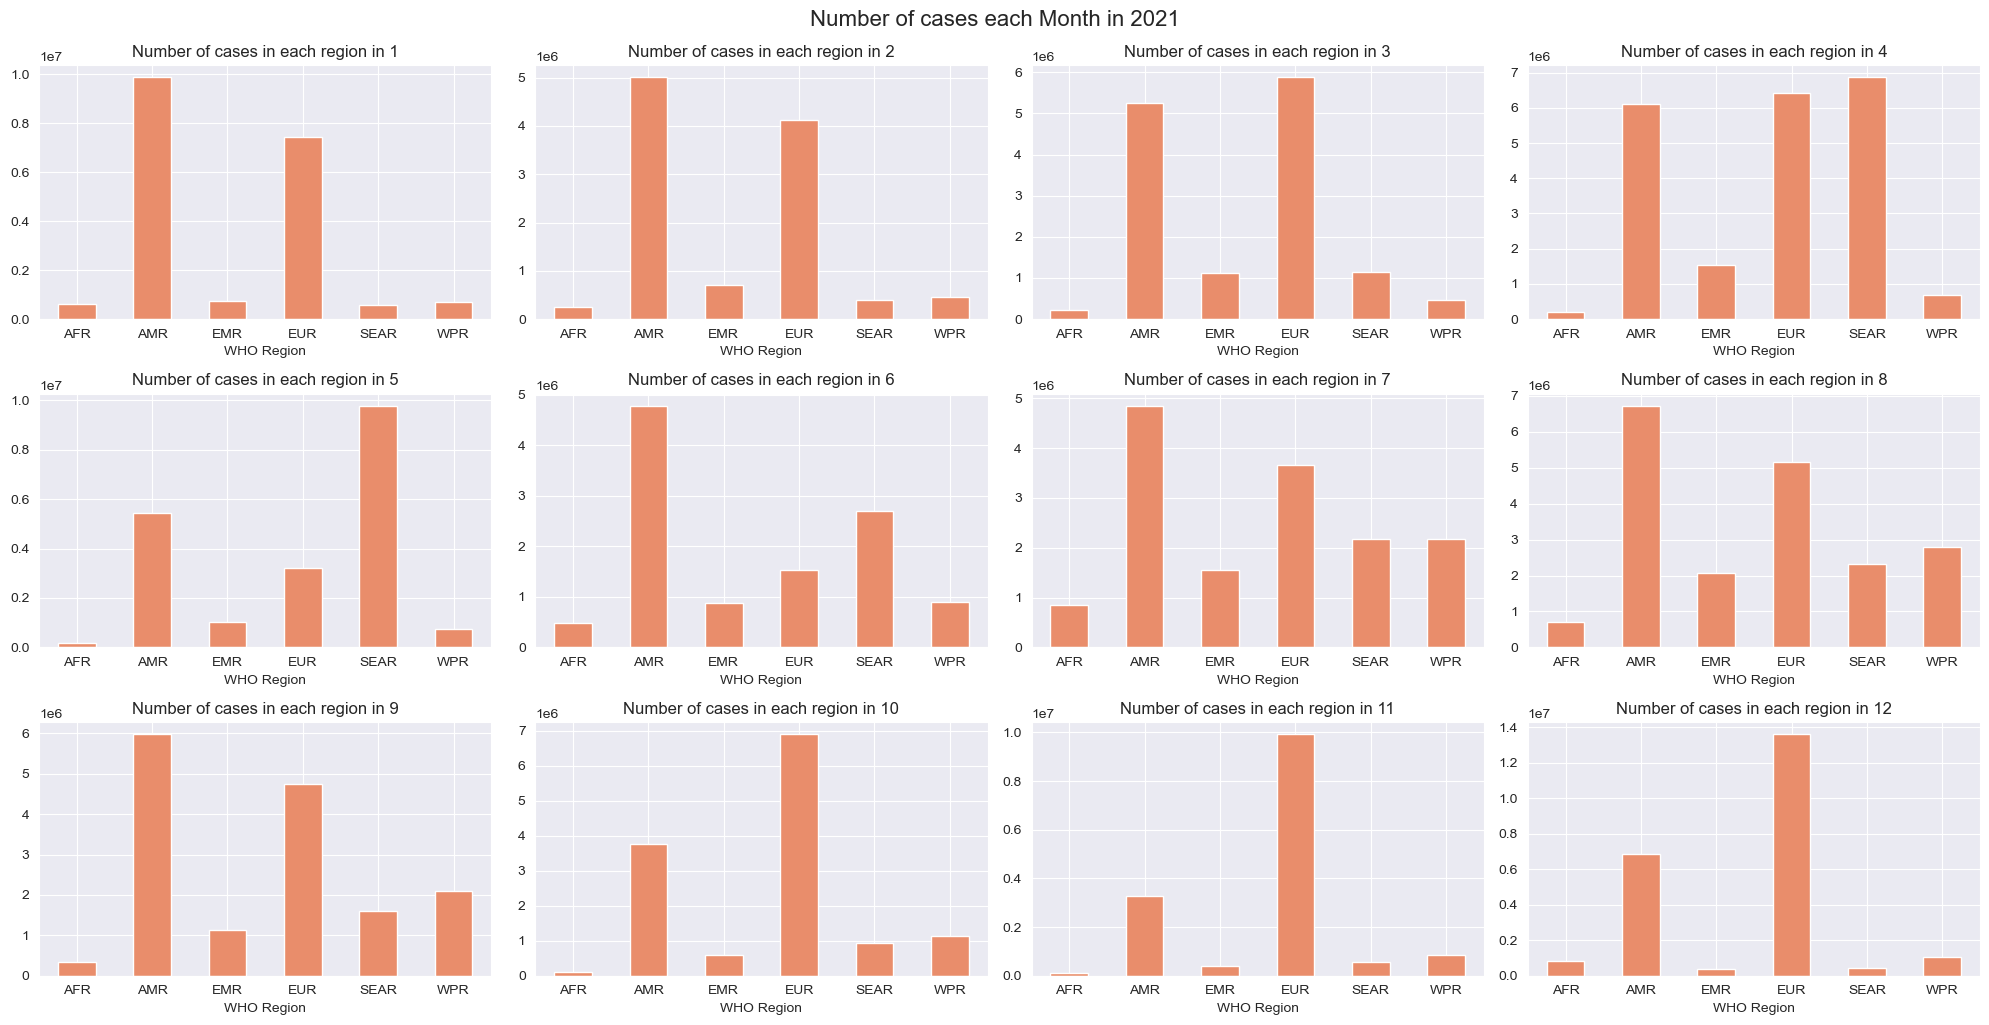

In [129]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 10))
axs = axs.flatten()
for y, c in enumerate(year2021['month'].unique()):
    year2021[year2021['month'] == c].groupby('WHO_region')['New_cases'].sum().plot(kind='bar', ax=axs[y])
    axs[y].set_xticklabels(axs[y].get_xticklabels(), rotation=0)
    axs[y].set_xlabel('WHO Region')
    axs[y].set_title(f'Number of cases in each region in {c}')

plt.tight_layout()
plt.suptitle('Number of cases each Month in 2021', x=0.5, y=1.02, fontsize=16)
plt.show()

<h3>January was the month with the most number of deaths and AMR is the region with the most number of deaths </h3>

In [130]:
year2021['New_cases'].corr(year2021['New_deaths'])

0.7672192345470676

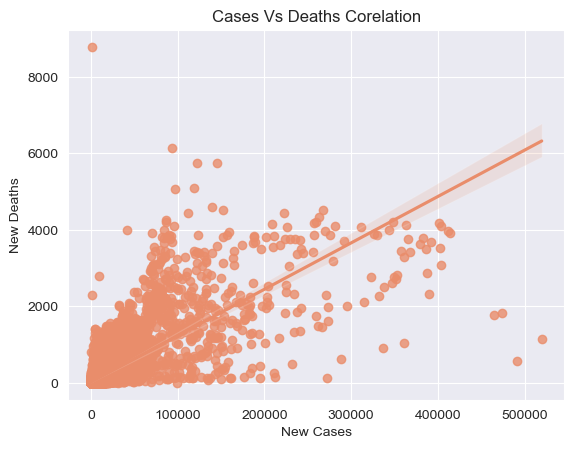

In [131]:
sns.regplot(data= year2021, x= 'New_cases', y= 'New_deaths')
plt.xlabel('New Cases')
plt.ylabel('New Deaths')
plt.title("Cases Vs Deaths Corelation")
plt.show()

<h3>Correlation Between Deaths and Cases in 2021 is 76%</h3>